Ben Trey, Qiwen Hu, Ivan Schwieger<br>
APM115: Mathematical Modeling<br>
Homework 2 (group)<br>
2/18/2021<br>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
#Runge-Kutta 4th
def runge_kutta_4th(yi, f, ti, tf, dt=0.1):
    ts = np.arange(ti, tf, dt)
    ys = np.zeros((len(yi), len(ts)))
    ys[:,0] = yi
    for n in range(len(ts)-1):
        k1 = f(ts[n],ys[:,n])
        k2 = f(ts[n]+dt/2, ys[:,n]+dt*k1/2)
        k3 = f(ts[n]+dt/2, ys[:,n]+dt*k2/2)
        k4 = f(ts[n]+dt, ys[:,n]+dt*k3)
        ys[:,n+1] = ys[:,n] + dt/6*(k1+2*k2+2*k3+k4)
    return ts, ys

#Neton's Method
def newtons_method(xi, f, accuracy=0.001, delta=0.001):
    old_x = xi
    keep_going = True
    while keep_going:
        diff = (f(old_x+delta)-f(old_x))/delta
        new_x = old_x-f(old_x)/diff
        keep_going = abs((old_x-new_x)/new_x)>accuracy
        old_x = new_x
    return new_x

<b>Group component (To be completed in groups of 3 or 4. Members of the same group
can turn in the same code and write-up. Please list the names of your group
members.)</b>

<h1>Problem 8</h1>

<i>Climate Complete the climate exercise. Turn in the code and a brief
description of your findings. Note that when the parameters are changed slowly, the
system has enough time to adjust and can stay close to a fixed point corresponding to the
parameters at the time.</i>

<i>1. Use climate_temperature_tendency.m to plot the temperature
tendency (dT/dt) as a function of temperature for the
temperature range of [220, 300] Kelvin.</i><br><br>

In [4]:
sigma=5.67e-8
H=1e8

def alpha(T):
    if T>273:
        return 0.3
    elif T >= 263:
        return 0.3*(1+(273-T)/10)
    else:
        return 0.6

def climate_tendency(T, S0=2200):
    dTdt = ((1-alpha(T))*S0/4-sigma*T**4)/H
    return dTdt

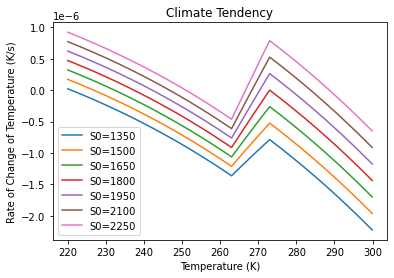

In [5]:
T = np.arange(220,300,0.1)
S = np.arange(1350,2300,150)
for s in S:
    y = [climate_tendency(t,s) for t in T] 
    plt.plot(T, y, label="S0="+str(s))

plt.title('Climate Tendency')
plt.xlabel('Temperature (K)')
plt.ylabel('Rate of Change of Temperature (K/s)')
plt.legend()
plt.show()

<i>2. Find the fixed points and identify their stability</i>

Assuming the fixed temperature is above $273 \mathrm{K}$, at the fixed point $\frac{dT_s}{dt} = 0 \implies T_s = \left(\frac{1-\alpha}{4 \sigma} S_0\right)^\frac{1}{4} \approx 287 K$. There are other solutions to this equation but they are not physically reasonable as they are below absolute zero.

In [6]:
fixed_point = ((1-0.3)/4/sigma*2200)**0.25
print("fixed point: ", fixed_point)
print("climate tendency: ", climate_tendency(fixed_point, 2200))


fixed point:  287.0578433211224
climate tendency:  -1.7053025658242403e-21


Assuming the fixed temperature is above $263 \mathrm{K}$ but below $273 \mathrm{K}$, at the fixed point $\frac{dT_s}{dt} = 0 \implies T_s \approx 267 K$.

In [7]:
newtons_method(265, climate_tendency)
    

267.1770532548417

Assuming the fixed temperature is above $263 \mathrm{K}$, at the fixed point $\frac{dT_s}{dt} = 0 \implies T_s = \left(\frac{1-\alpha}{4 \sigma} S_0\right)^\frac{1}{4} \approx 250 K$.

In [8]:
fixed_point = ((1-0.6)/4/sigma*2200)**0.25
print("fixed point: ", fixed_point)
print("climate tendency: ", climate_tendency(fixed_point, 2200))


fixed point:  249.5800718944141
climate tendency:  -2.842170943040401e-22


Looking at the slope of the fixed points when they intersect the T-axis the points at $249 \mathrm{K}$ and $287 \mathrm{K}$ are stable, and the point at $267 \mathrm{K}$ is unstable. 

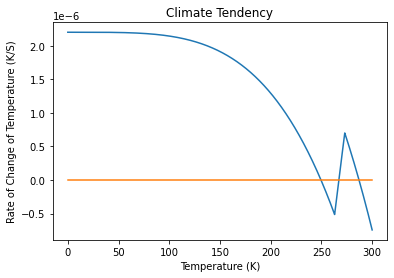

In [9]:
T = np.arange(0,300,0.01)
y = [climate_tendency(t) for t in T] 
plt.title('Climate Tendency')
plt.xlabel('Temperature (K)')
plt.ylabel('Rate of Change of Temperature (K/S)')
plt.plot(T, y)
plt.plot([0,300],[0,0])
plt.show()

<i>3. Imagine that we are at the warm stable fixed point. If we slowly
(e.g. over a period of 30000 days) reduce the solar constant
towards 70% of its current value (thought to be the value early
in the solar system history) and compute Ts
. Then gradually
increase the solar constant towards 130% of its current value
(e.g. over a period of 60000 days) and compute Ts
. What do you
see? Can you explain the behavior (hint: graph the two righthand-side terms of the energy balance equation as functions of
S0)? (Note that with the units used here dTs/dt is in units of
Kelvin/second)</i>

In [10]:
def coef(time, days, change):
    return 1+change*time/days/24/3600

def modified_climate_tendency(t, T, days, change, coef):
    dTdt = ((1-alpha(T))*coef(t,days,change)*2200/4-sigma*T**4)/H
    return np.array([dTdt])

def modified_climate_tendency_wrapper(days, change, coef):
    return lambda t, T: modified_climate_tendency(t, T, days, change, coef)

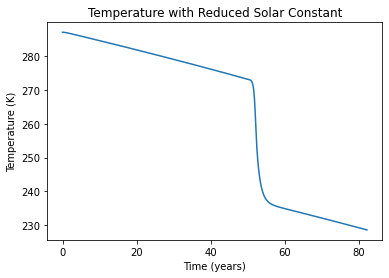

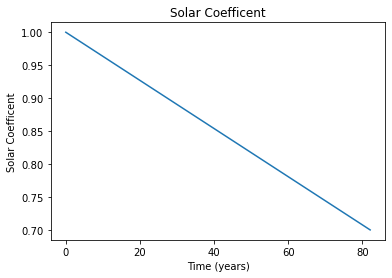

In [11]:
f = modified_climate_tendency_wrapper(30000, -0.30, coef)
ti = 0
tf = 30000*24*3600
t, T = runge_kutta_4th([287.05], f, ti, tf, 10**5)

plt.title('Temperature with Reduced Solar Constant')
plt.ylabel('Temperature (K)')
plt.xlabel('Time (years)')
plt.plot(t/24/3600/365.25,T[0])
plt.show()

y = [coef(tn, 30000, -0.30) for tn in t]
plt.title('Solar Coefficent')
plt.ylabel('Solar Coefficent')
plt.xlabel('Time (years)')
plt.plot(t/24/3600/365.25, y)
plt.show()

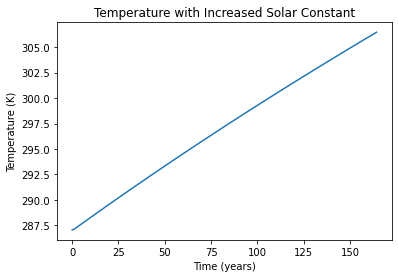

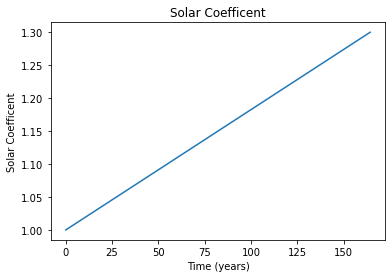

In [12]:
f = modified_climate_tendency_wrapper(60000, 0.30, coef)
ti = 0
tf = 60000*24*3600
t, T = runge_kutta_4th([287.05], f, ti, tf, 10**5)

plt.title('Temperature with Increased Solar Constant')
plt.ylabel('Temperature (K)')
plt.xlabel('Time (years)')
plt.plot(t/24/3600/365.25,T[0])
plt.show()

y = [coef(tn, 60000, 0.30) for tn in t]
plt.title('Solar Coefficent')
plt.ylabel('Solar Coefficent')
plt.xlabel('Time (years)')
plt.plot(t/24/3600/365.25, y)
plt.show()

In [13]:
def coefb(t, days, change):
    return abs(0.3-t/100000/24/3600)+0.7

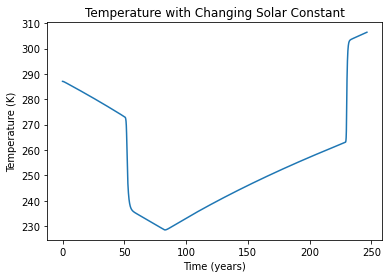

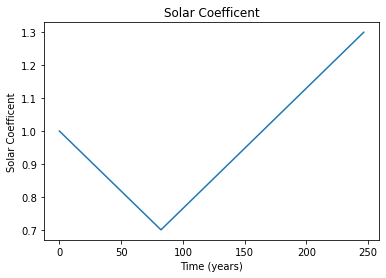

In [14]:
f = modified_climate_tendency_wrapper(90000, 0.30, coefb)
ti = 0
tf = 90000*24*3600
t, T = runge_kutta_4th([287.05], f, ti, tf, 10**6)

plt.title('Temperature with Changing Solar Constant')
plt.ylabel('Temperature (K)')
plt.xlabel('Time (years)')
plt.plot(t/24/3600/365.25,T[0])
plt.show()

y = [coefb(tn, 90000, 0.30) for tn in t]
plt.title('Solar Coefficent')
plt.ylabel('Solar Coefficent')
plt.xlabel('Time (years)')
plt.plot(t/24/3600/365.25, y)
plt.show()

<i>4. Given the complexity of the climate system, what is the value of
such a simple model?</i><br><br>
First order approximations models were useful in the approximation of the yield of nuclear bombs and the stability of black holes produced at the Large Hadron Collider. A simple model will also allow fine tuning once hyper parameters or perturbation theory is applied. Of course this anaylsis is known as the story of a physicst encountering a new field. (Why don't you create a simple model and use perturbation theory. 
<img src="https://imgs.xkcd.com/comics/physicists.png"></img>

<h1>Problem 9</h1>

<i>9. (20 points) Stochastic population. Modify the code shown in class
(stochastic_simulation_logistic.m) to study the evolution of the probability distribution
with time. Note that the distribution that we derived analytically in the notes is the
equilibrium probability distribution, toward which the probability distribution will
evolve.
To do so, make a large number (say 5000) of realizations of the same system. While the
different realizations have identical parameters, because we are dealing with stochastic
systems (and we are using a random number generator to simulate it), the different
realizations will evolve differently.
Now run the 5000 realizations forward in time for 10000 time-steps. After every 100
time-steps, record the distribution of population among the 5000 realizations and plot it.
You could do this for every time step but doing this after every 100 time-steps reduces
the number of plots that you make.
Observe the evolution of the probability distributions.
Turn in your code and a brief report with plots of some representative probability
distributions and a brief discussion of what are shown. 
</i>

The distribution slowly moves to the right. It starts with no width and the width grows over time. I ploted the means to show the behaviour. 

In [36]:
R=1
K=50
dimP=10*K
mu=R/K
lambda_var=R*(1-(1/K))
dt=0.001

t = np.arange(0,5.0,dt)
results = np.zeros((5000,len(t)))
results[:, 0] = 3

for row in tqdm(range(results.shape[0])):
    for column in range(results.shape[1]-1):
        r = np.random.random()
        if r<lambda_var*results[row,column]*dt:
            results[row,column+1] = results[row,column]+1
        elif r<(lambda_var*results[row,column]+mu*results[row,column]*(results[row,column]-1))*dt:
            results[row,column+1] = results[row,column]-1
        else:
            results[row,column+1] = results[row,column]
            
mean_results = np.sum(results,axis=0)/5000

[]

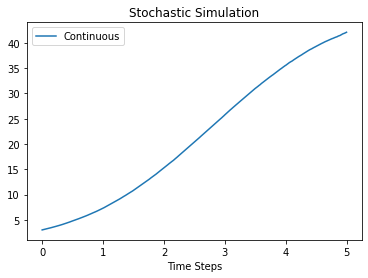

In [30]:
plt.title('Stochastic Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Mean')
plt.plot(t,results,label="Continuous")
plt.legend()
plt.plot()

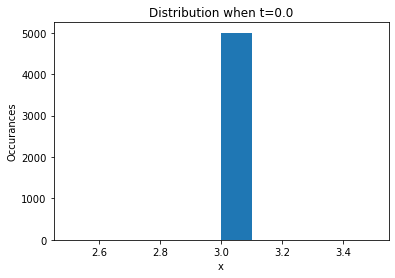

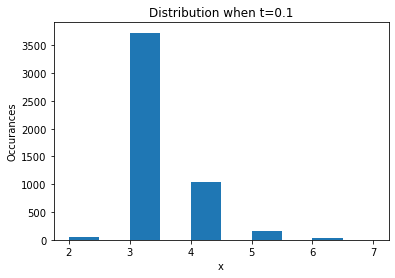

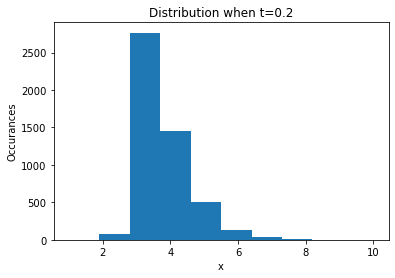

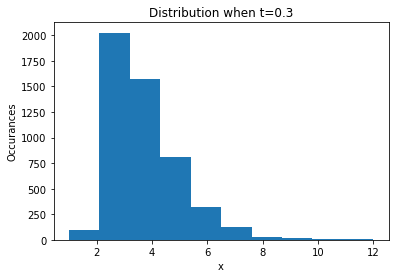

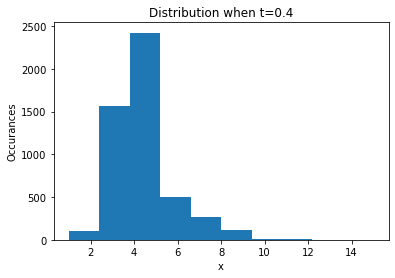

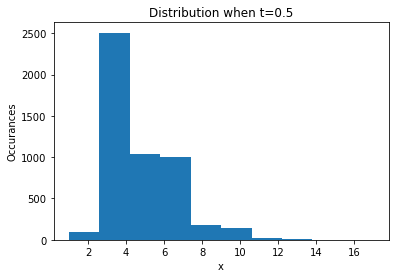

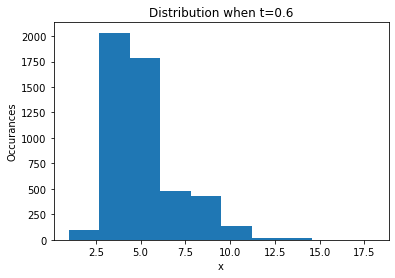

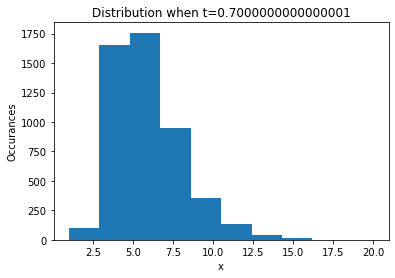

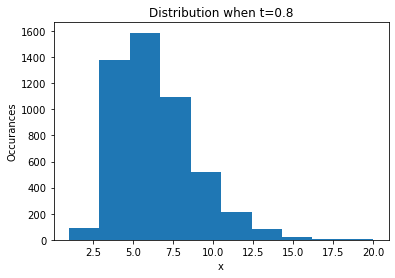

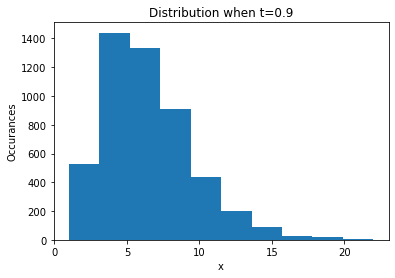

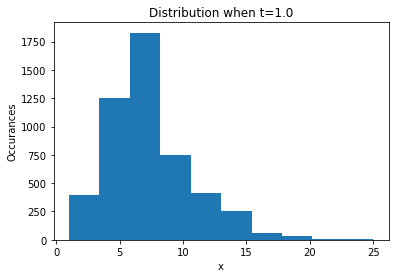

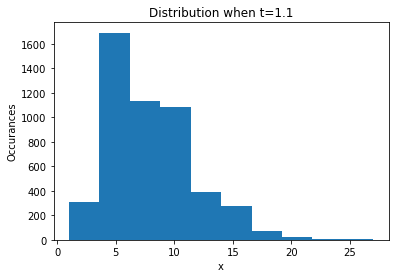

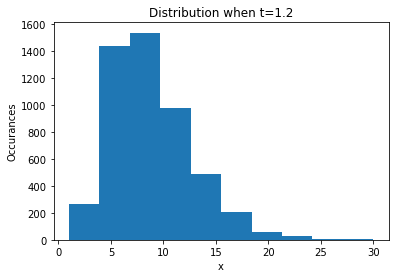

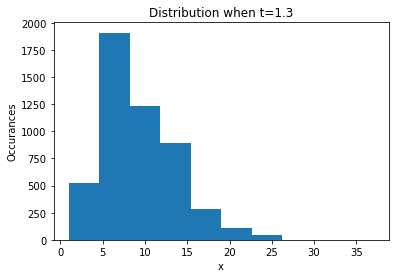

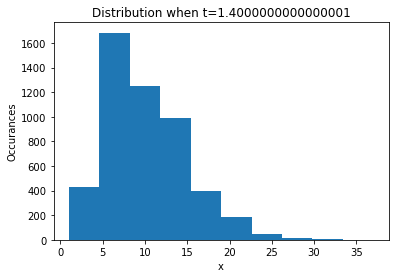

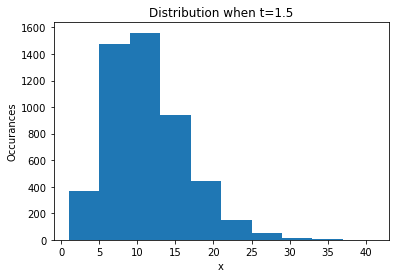

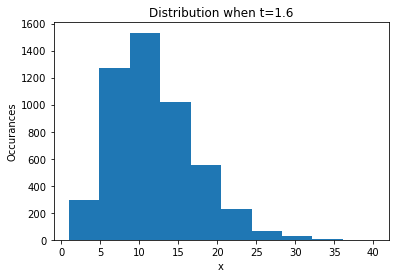

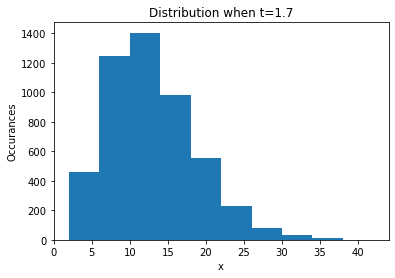

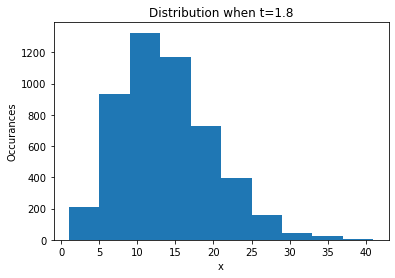

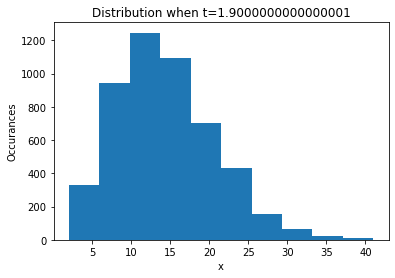

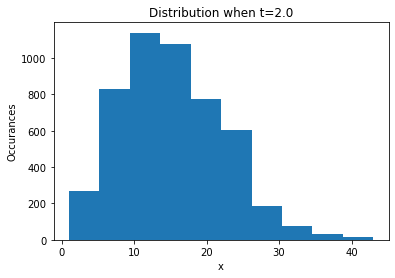

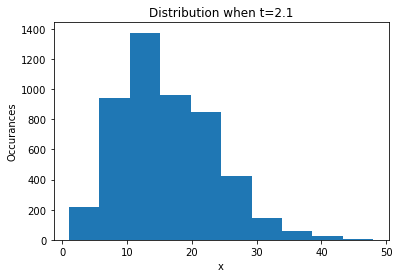

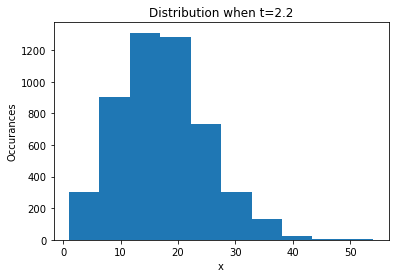

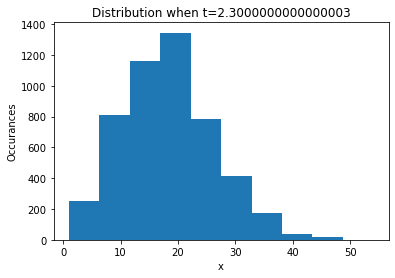

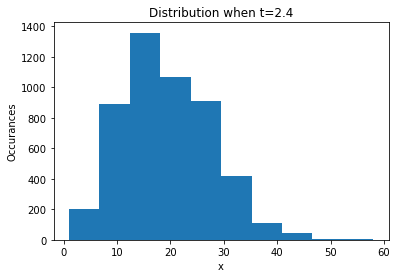

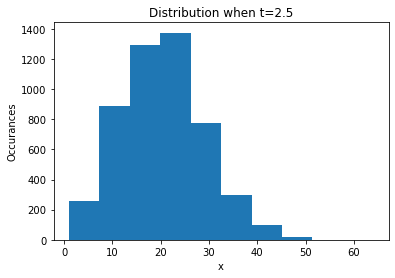

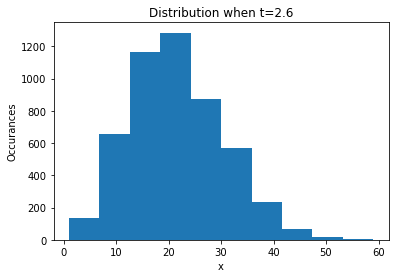

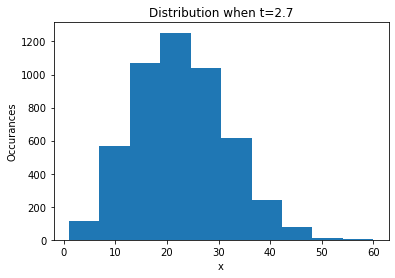

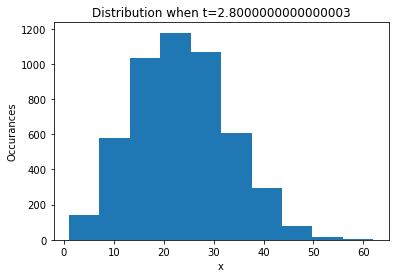

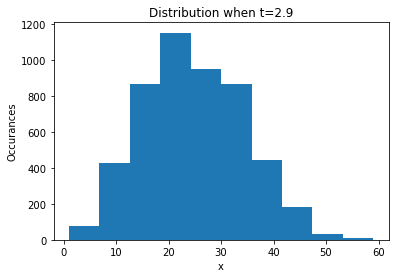

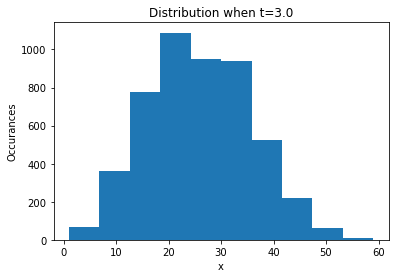

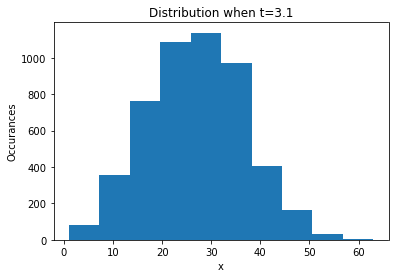

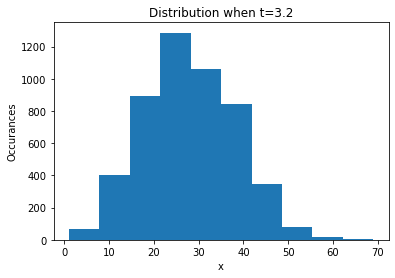

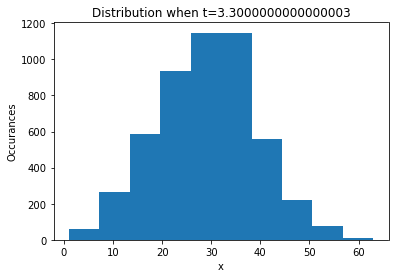

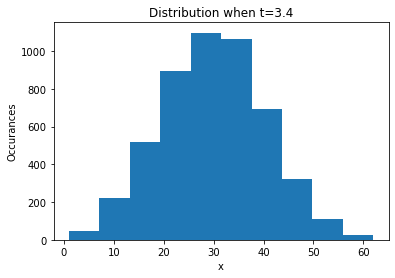

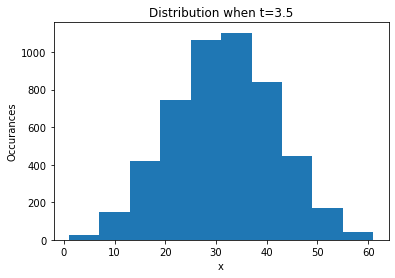

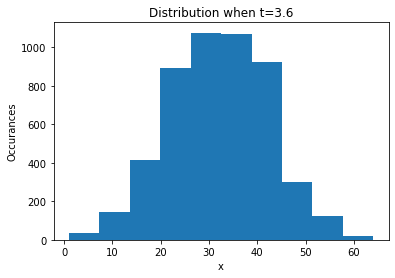

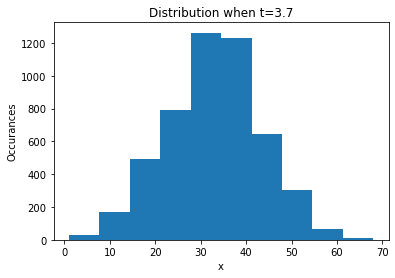

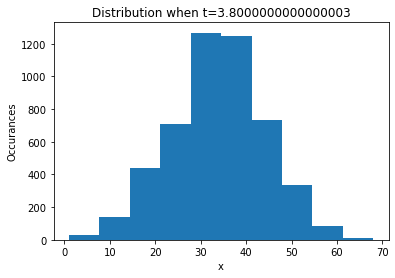

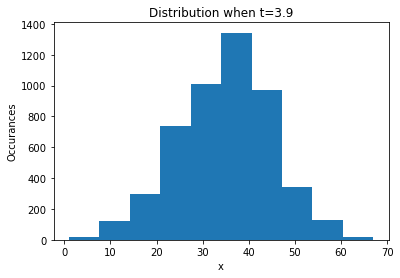

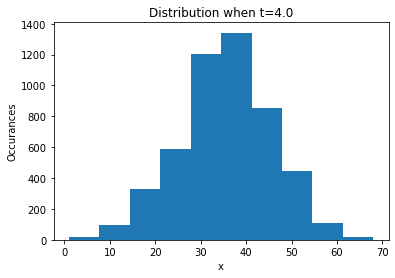

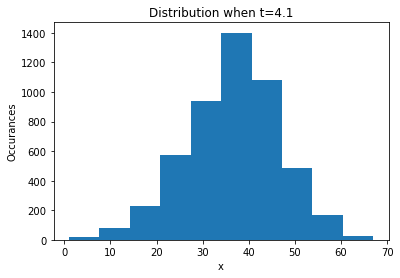

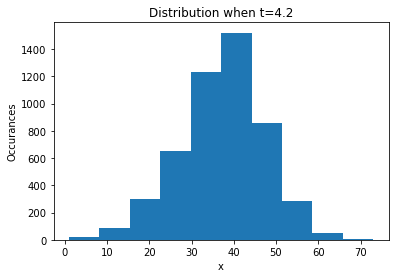

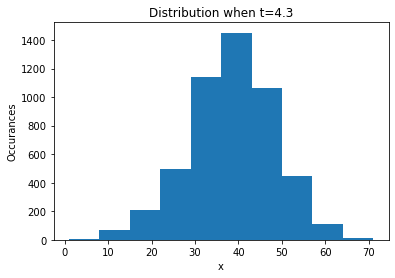

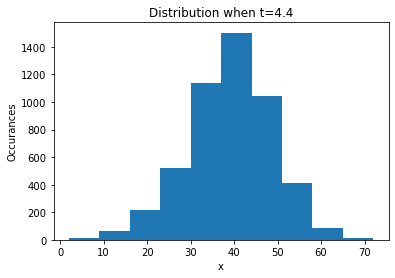

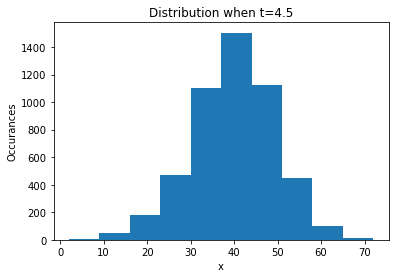

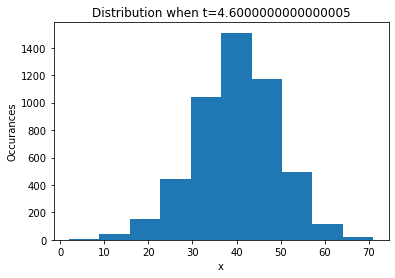

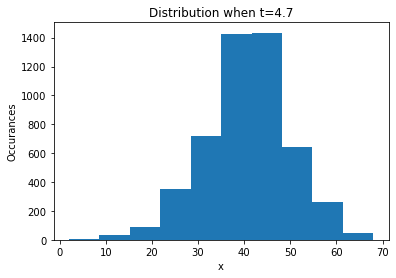

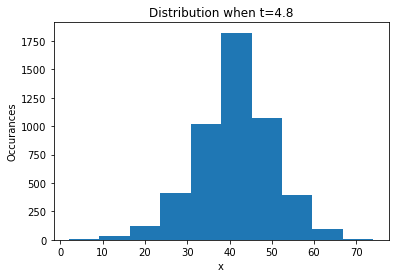

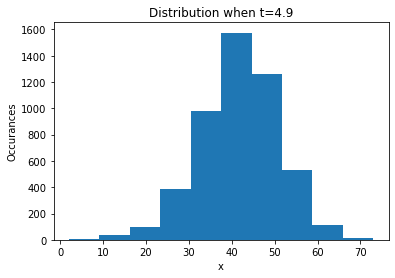

In [44]:
for t in range(50):
    plt.title('Distribution when t='+str(t*100*dt))
    plt.ylabel('Occurances')
    plt.xlabel('x')
    plt.hist(results[:,t*100])
    plt.show()

<h1>Problem 10</h1>

<i>10. (Extra credit, 10 points) Valentine’s day Valentine’s day is around the corner. A
local florist comes to you to consult how many roses she should order. If she orders too
many, roses are perishable and those that not sold by Valentine’s day’s end will be lost. If
she orders too few, she will lose valuable sales opportunities; sales for the Valentine’s
day represent a significant portion of the annual sales for the florist. What factors would
you consider, what information would you gather, what approaches (deterministic or
probabilistic) would you take towards building a mathematical model to help the florist?
You are only asked to sketch out some ideas; no equations are necessary at this stage.
Happy Valentine’s Day, everyone!</i>

I would like to have a probability distribution of likely hood of selling a particular amount of flowers. This is not easily measureable so I would ask the florist what they estimate as the maximum and minimum amount of flowers sold historically on Valentines Day. I could use difference between these numbers as 4 standard deviations and a normal distribution of likelihoods for a particular number of flowers sold. Using this analysis I would also need to know the growth of the buisness. I would need to estimate when they company was doing a similar amount of buisness so my estimates for standard deviation stay relavant.  A normal distribution is not perfect for every situation but it is a good place to start. I would then need to know the florists costs and prices to get an expectation value for their profit. I would sum through each amount of flowers ordered and give the value that gives the best expectation value. 